(21201, 29)

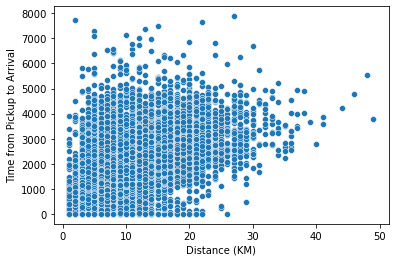

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/Train.csv")
#df.columns
#df.head()
columns_to_drop = ['User Id', 'Vehicle Type', 'Platform Type', 'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id']
new_df = df.drop(columns=columns_to_drop)
new_df.head()
new_df.columns
sns.scatterplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=new_df)
#sns.histplot(x='Distance (KM)', data=new_df)
#new_df.dtypes
df.shape

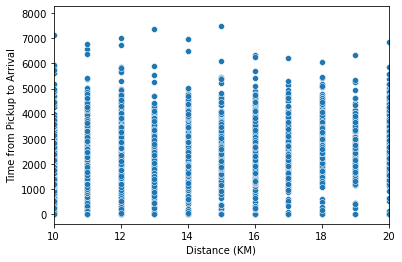

In [95]:
fig, ax = plt.subplots()
sns.scatterplot(x='Distance (KM)', y='Time from Pickup to Arrival', data=new_df)
#sns.histplot(x='Distance (KM)', data=new_df)
ax.set_xlim(10, 20)
plt.show()

In [96]:
clean_df = pd.read_csv("data/train_clean.csv")
clean_df.loc[:20, "Arrival_at_Pickup__Time"]

clean_df["Arrival_at_Pickup__Time"] = pd.to_datetime(clean_df.Arrival_at_Pickup__Time)
clean_df.loc[:20, "Arrival_at_Pickup__Time"]

min_delivery_time = clean_df["Arrival_at_Pickup__Time"].min()
min_delivery_time
clean_df.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type',
       'Personal_or_Business', 'Placement__Day_of_Month',
       'Placement__Weekday_', 'Placement__Time', 'Confirmation__Day_of_Month',
       'Confirmation__Weekday_', 'Confirmation__Time',
       'Arrival_at_Pickup__Day_of_Month', 'Arrival_at_Pickup__Weekday_',
       'Arrival_at_Pickup__Time', 'Pickup__Day_of_Month', 'Pickup__Weekday_',
       'Pickup__Time', 'Arrival_at_Destination__Day_of_Month',
       'Arrival_at_Destination__Weekday_', 'Arrival_at_Destination__Time',
       'Distance', 'Temperature', 'Pickup_Lat', 'Pickup_Long',
       'Destination_Lat', 'Destination_Long', 'Rider_Id',
       'Time_from_Pickup_to_Arrival'],
      dtype='object')

<AxesSubplot:xlabel='Distance', ylabel='Time_from_Pickup_to_Arrival'>

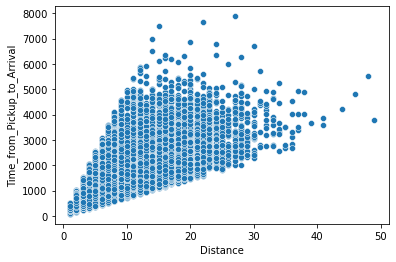

In [97]:
clean_df.loc[:20, "Arrival_at_Pickup__Time"]
sns.scatterplot(x = "Distance", y = "Time_from_Pickup_to_Arrival", data = clean_df)

In [98]:
clean_df["Arrival_at_Pickup__Time"].max()

Timestamp('2022-07-25 23:10:00')

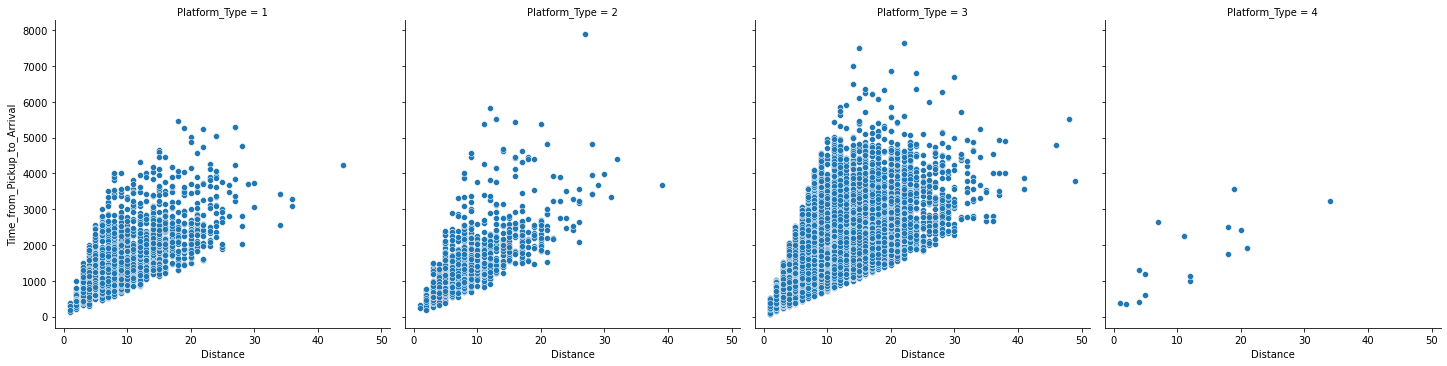

In [99]:
import datetime as datetime
mid_day = datetime.datetime(2022, 7, 25, 9, 0, 0)
(clean_df["Arrival_at_Pickup__Time"] < mid_day).sum()
sns.relplot(x = "Distance", y = "Time_from_Pickup_to_Arrival", kind = "scatter", col = "Platform_Type", data = clean_df)

In [100]:
clean_df.loc[:20, "Arrival_at_Pickup__Time"]

0    2022-07-25 10:04:47
1    2022-07-25 16:07:16
2    2022-07-25 13:20:02
3    2022-07-25 07:35:24
4    2022-07-25 10:56:00
5    2022-07-25 12:21:54
6    2022-07-25 09:14:25
7    2022-07-25 16:30:34
8    2022-07-25 15:20:45
9    2022-07-25 15:05:00
10   2022-07-25 17:07:46
11   2022-07-25 16:26:42
12   2022-07-25 10:50:06
13   2022-07-25 12:51:17
14   2022-07-25 14:04:15
15   2022-07-25 11:18:56
16   2022-07-25 17:36:26
17   2022-07-25 12:54:28
18   2022-07-25 08:14:04
19   2022-07-25 13:39:06
20   2022-07-25 14:05:18
Name: Arrival_at_Pickup__Time, dtype: datetime64[ns]

In [101]:
df_with_times = clean_df.copy(deep = True)

morning = datetime.datetime(2022, 7, 25, 9, 0, 0)
#mid_day = datetime.datetime(2022, 7, 25, 10, 30, 0)
noon = datetime.datetime(2022, 7, 25, 12, 0, 0)
before_rush = datetime.datetime(2022, 7, 25, 16, 0, 0)
after_rush = datetime.datetime(2022, 7, 25, 18, 0, 0)

df_with_times["Morning"] = [1 if x < morning else 0 for x in df_with_times["Arrival_at_Pickup__Time"]]
df_with_times["Mid_day"] = [1 if x > morning and x < noon else 0 for x in df_with_times["Arrival_at_Pickup__Time"]]
df_with_times["Afternoon"] = [1 if x > noon and x < before_rush else 0 for x in df_with_times["Arrival_at_Pickup__Time"]]
df_with_times["Rush_hour"] = [1 if x > before_rush and x < after_rush else 0 for x in df_with_times["Arrival_at_Pickup__Time"]]
df_with_times["Evening"] = [1 if x > after_rush else 0 for x in df_with_times["Arrival_at_Pickup__Time"]]

def check_time_division(df):
    if df["Morning"] == 1:
        return "Morning"
    if df["Mid_day"] == 1:
        return "Mid_day"
    if df["Afternoon"] == 1:
        return "Afternoon"
    if df["Rush_hour"] == 1:
        return "Rush_hour"
    return "Evening"

df_with_times["Time_division"] = df_with_times.apply(check_time_division, axis = 1)
df_with_times["Total_time_minutes"] = df_with_times["Time_from_Pickup_to_Arrival"] / 60

df_with_times.head(20)

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement__Day_of_Month,Placement__Weekday_,Placement__Time,Confirmation__Day_of_Month,Confirmation__Weekday_,...,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Morning,Mid_day,Afternoon,Rush_hour,Evening,Time_division,Total_time_minutes
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,36.829741,Rider_Id_432,745,0,1,0,0,0,Mid_day,12.416667
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,36.904295,Rider_Id_432,2886,0,0,0,1,0,Rush_hour,48.100000
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,36.818206,Rider_Id_432,2615,0,0,1,0,0,Afternoon,43.583333
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,36.802061,Rider_Id_432,2986,1,0,0,0,0,Morning,49.766667
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,36.752427,Rider_Id_432,1602,0,1,0,0,0,Mid_day,26.700000
5,Order_No_10440,User_Id_2801,Bike,3,Business,29,3,12:14:43 PM,29,3,...,36.892534,Rider_Id_432,2313,0,0,1,0,0,Afternoon,38.550000
6,Order_No_25321,User_Id_1882,Bike,1,Business,2,2,9:08:42 AM,2,2,...,36.800577,Rider_Id_432,1638,0,1,0,0,0,Mid_day,27.300000
7,Order_No_2476,User_Id_2260,Bike,1,Personal,19,5,4:12:56 PM,19,5,...,36.821382,Rider_Id_432,1897,0,0,0,1,0,Rush_hour,31.616667
8,Order_No_14704,User_Id_2186,Bike,1,Personal,28,1,3:03:10 PM,28,1,...,36.871900,Rider_Id_432,1698,0,0,1,0,0,Afternoon,28.300000
9,Order_No_118,User_Id_3688,Bike,3,Business,14,4,2:42:58 PM,14,4,...,36.865718,Rider_Id_432,2693,0,0,1,0,0,Afternoon,44.883333


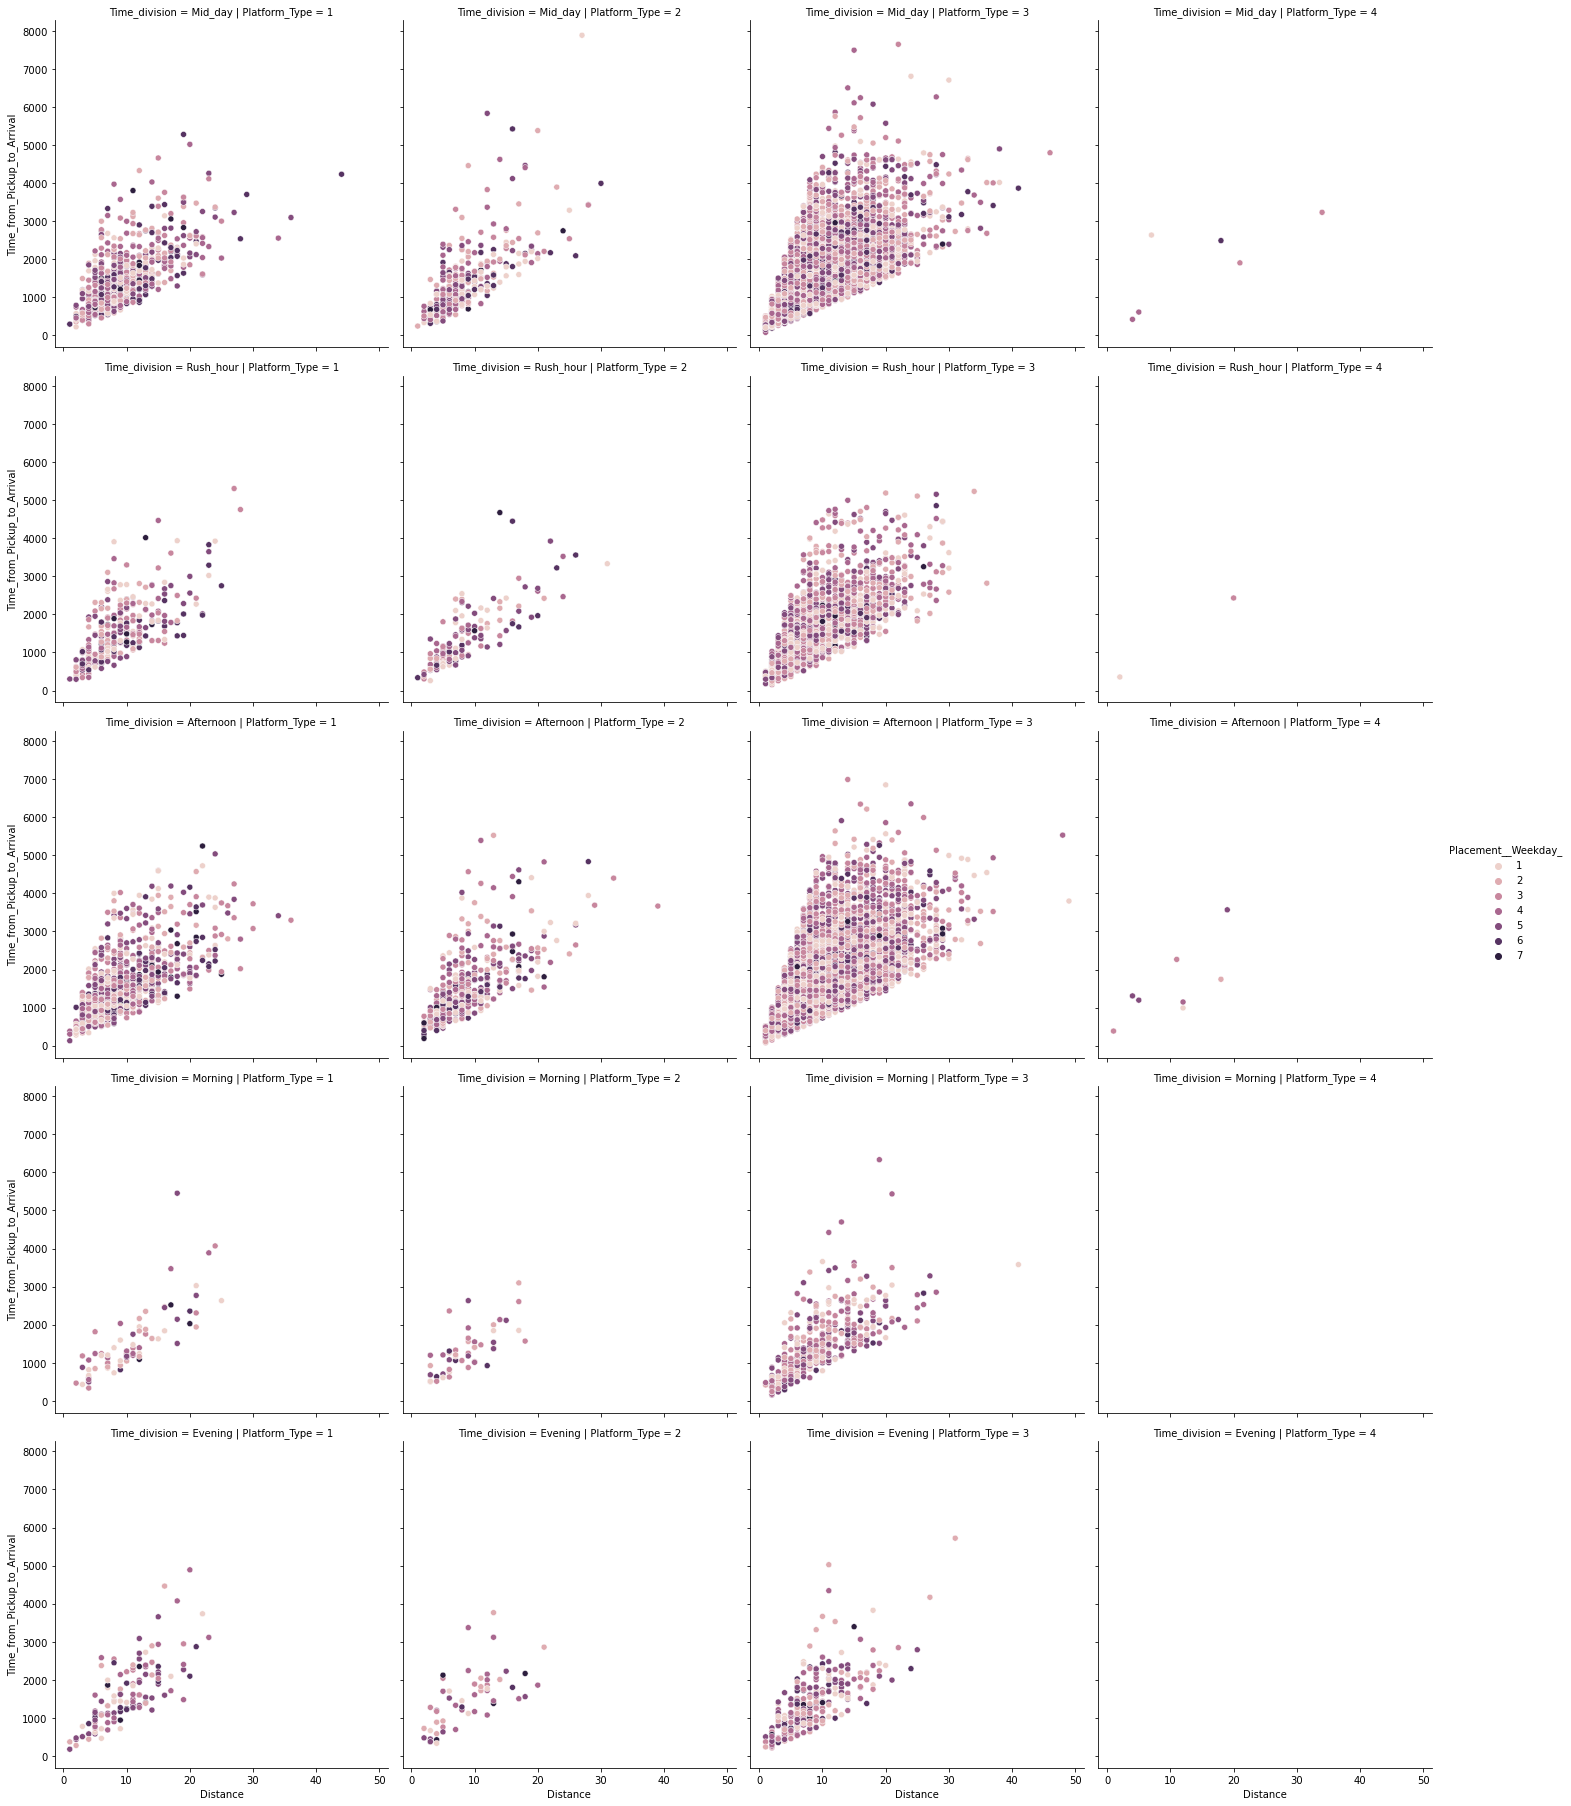

In [102]:
sns.relplot(x = "Distance", y = "Time_from_Pickup_to_Arrival", kind = "scatter", hue = "Placement__Weekday_", col = "Platform_Type", row = "Time_division", data = df_with_times)

Platform_Type                           0.021456
Placement__Day_of_Month                -0.016131
Placement__Weekday_                     0.013647
Confirmation__Day_of_Month             -0.016121
Confirmation__Weekday_                  0.013704
Arrival_at_Pickup__Day_of_Month        -0.016121
Arrival_at_Pickup__Weekday_             0.013704
Pickup__Day_of_Month                   -0.016121
Pickup__Weekday_                        0.013704
Arrival_at_Destination__Day_of_Month   -0.016121
Arrival_at_Destination__Weekday_        0.013704
Distance                                0.685009
Temperature                             0.024935
Pickup_Lat                             -0.082060
Pickup_Long                             0.091700
Destination_Lat                        -0.069824
Destination_Long                        0.086650
Time_from_Pickup_to_Arrival             1.000000
Morning                                -0.022670
Mid_day                                -0.016489
Afternoon           

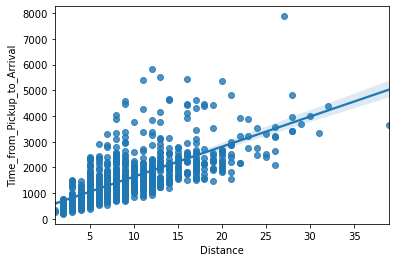

In [103]:
sns.regplot(x = "Distance", y = "Time_from_Pickup_to_Arrival", data = df_with_times[df_with_times["Platform_Type"] == 2])
df_with_times.corrwith(df_with_times["Time_from_Pickup_to_Arrival"])


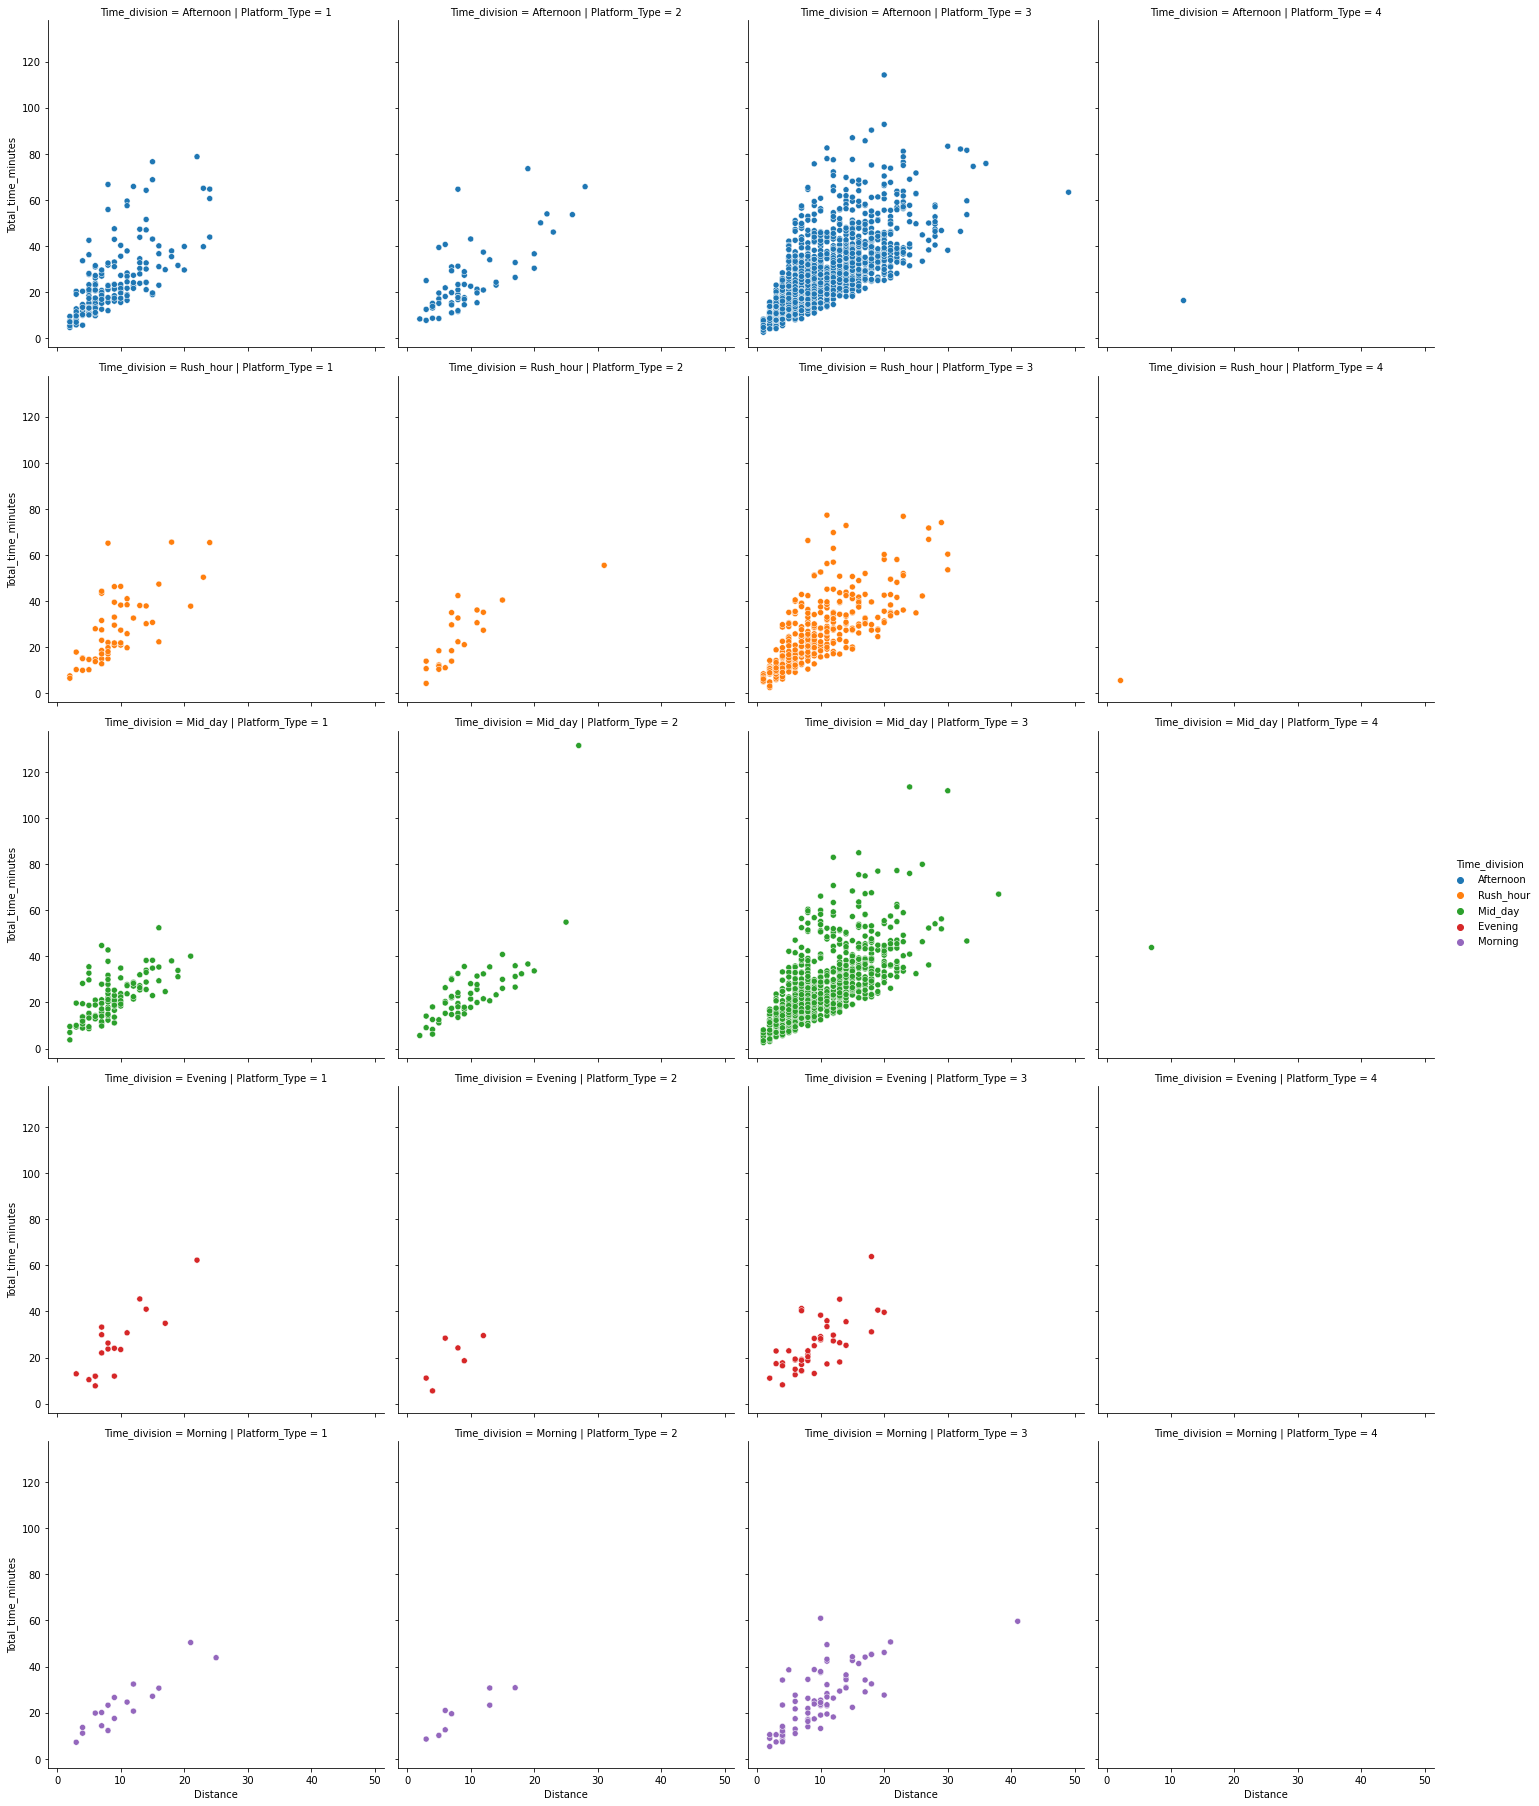

In [107]:
sns.relplot(x = "Distance", y = "Total_time_minutes", kind = "scatter", hue = "Time_division", col = "Platform_Type", row = "Time_division", data = df_with_times[df_with_times["Placement__Weekday_"] == 1])

# Model Testing Time

In [109]:
from sklearn.linear_model import LinearRegression
eta_model = LinearRegression()

eta_model.fit(X = df_with_times[['Distance', 'Platform_Type', 'Morning', 'Mid_day', 'Afternoon', 'Rush_hour', 'Evening', 'Placement__Weekday_']], y = df_with_times['Time_from_Pickup_to_Arrival'])
eta_model.coef_

array([110.36394595,  11.23765306, 115.19325497, 201.8438335 ,
       256.24564486, 289.76669245, 216.41957388,   5.95177663])

In [120]:
test_data = pd.read_csv("data/Test.csv")
test_data["Pickup_time"] = pd.to_datetime(test_data["Arrival at Pickup - Time"])

test_data["Morning"] = [1 if x < morning else 0 for x in test_data["Pickup_time"]]
test_data["Mid_day"] = [1 if x > morning and x < noon else 0 for x in test_data["Pickup_time"]]
test_data["Afternoon"] = [1 if x > noon and x < before_rush else 0 for x in test_data["Pickup_time"]]
test_data["Rush_hour"] = [1 if x > before_rush and x < after_rush else 0 for x in test_data["Pickup_time"]]
test_data["Evening"] = [1 if x > after_rush else 0 for x in test_data["Pickup_time"]]

eta_guess = eta_model.predict(test_data[['Distance (KM)', 'Platform Type', 'Morning', 'Mid_day', 'Afternoon', 'Rush_hour', 'Evening', 'Placement - Weekday (Mo = 1)']])
eta_guess

array([1390.50800625, 1071.31972166, 1065.36794502, ..., 1611.23589816,
       2488.19568916, 1384.55622962])